<a href="https://colab.research.google.com/github/NagamallaVinay/Task-5/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 5: Decision Trees and Random Forests**

Objective: Learn tree-based models for classification & regression.

Tools:  Scikit-learn, Graphviz


# **Importing Necessary Libraries**

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Load the Data
from google.colab import files
uploaded = files.upload()

Saving Heart.csv to Heart.csv


In [3]:
df = pd.read_csv('Heart.csv')
print("Heart dataset loaded successfully.\n")

Heart dataset loaded successfully.



In [4]:
# Prepare the data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **1.Train a Decision Tree Classifier and visualize the tree**

First, we will train a standard Decision Tree on our training data and then create a visual representation of it.

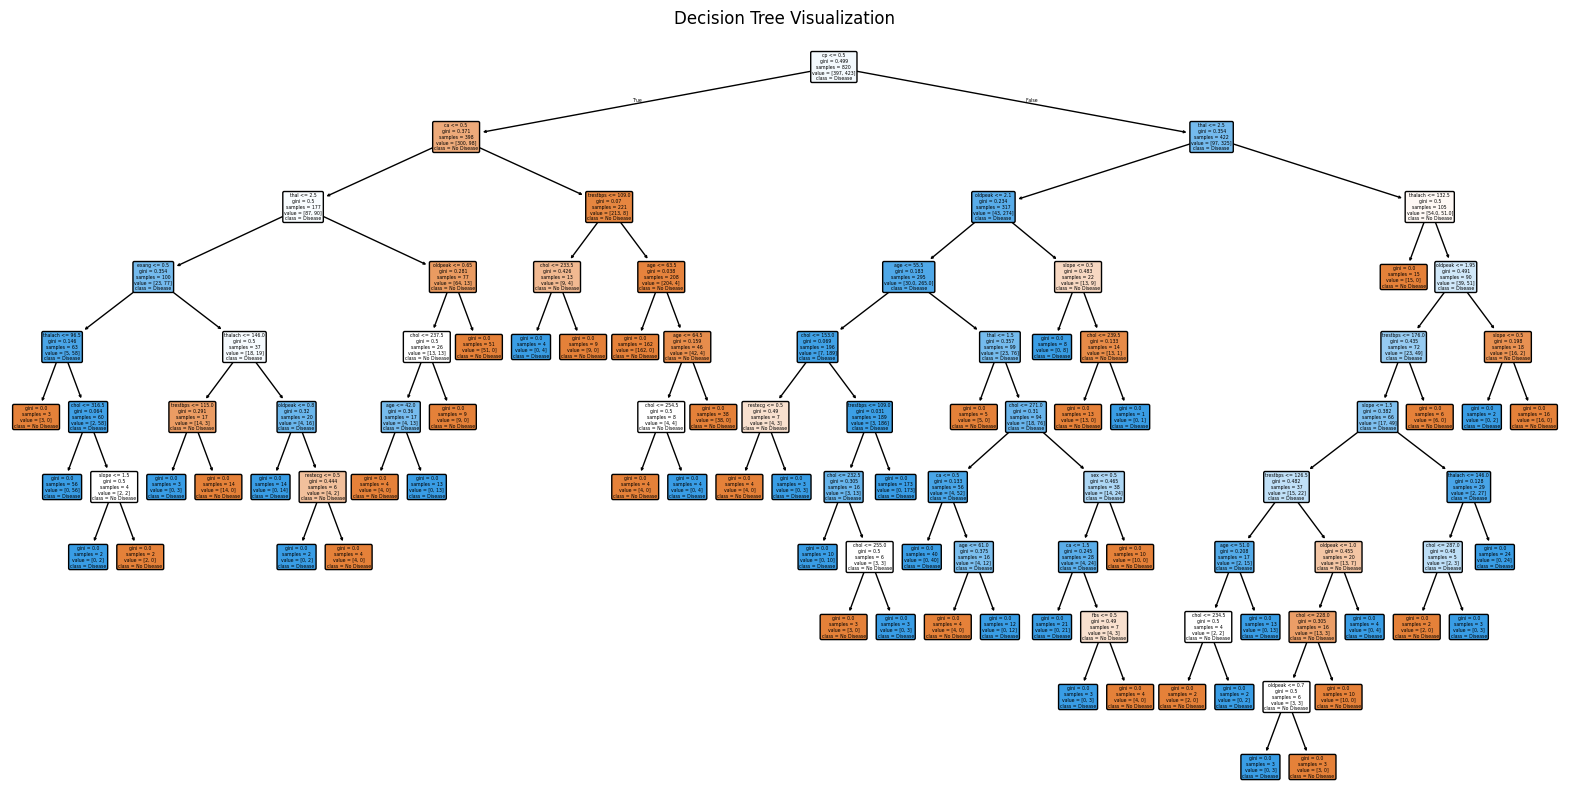

In [5]:
# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,
          filled=True,
          rounded=True,
          class_names=['No Disease', 'Disease'],
          feature_names=X.columns)
plt.title("Decision Tree Visualization")
plt.show()

### **Step 2: Analyze overfitting and control tree depth**

The tree above is very deep, which suggests it might be overfit to the training data. We'll check the accuracy on both training and test sets to confirm this, and then create a new, "pruned" tree by limiting its depth to prevent overfitting.

In [6]:
# Check for overfitting by comparing training and test accuracy
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

print(f"Unpruned Tree Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Unpruned Tree Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\n--> The 100% training accuracy indicates significant overfitting.")

# Control tree depth to prevent overfitting
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42) # Limiting depth to 4
dt_pruned.fit(X_train, y_train)

# Evaluate the pruned tree
y_train_pred_pruned = dt_pruned.predict(X_train)
y_test_pred_pruned = dt_pruned.predict(X_test)

print(f"\nPruned Tree (max_depth=4) Training Accuracy: {accuracy_score(y_train, y_train_pred_pruned):.4f}")
print(f"Pruned Tree (max_depth=4) Test Accuracy: {accuracy_score(y_test, y_test_pred_pruned):.4f}")

Unpruned Tree Training Accuracy: 1.0000
Unpruned Tree Test Accuracy: 0.9854

--> The 100% training accuracy indicates significant overfitting.

Pruned Tree (max_depth=4) Training Accuracy: 0.8829
Pruned Tree (max_depth=4) Test Accuracy: 0.8000


### **Step 3: Train a Random Forest and compare accuracy**
Next, we train a Random Forest, which is an ensemble of many decision trees. We will then compare its accuracy to our single decision tree models.

In [7]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Pruned Decision Tree Test Accuracy: {accuracy_score(y_test, y_test_pred_pruned):.4f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")
print("\n--> The Random Forest model provides a significant improvement in accuracy.")

Pruned Decision Tree Test Accuracy: 0.8000
Random Forest Test Accuracy: 0.9854

--> The Random Forest model provides a significant improvement in accuracy.


#  **Step 4: Interpret feature importances**
A key benefit of tree-based models is their ability to calculate feature importance. Let's see which features our Random Forest model found most predictive.

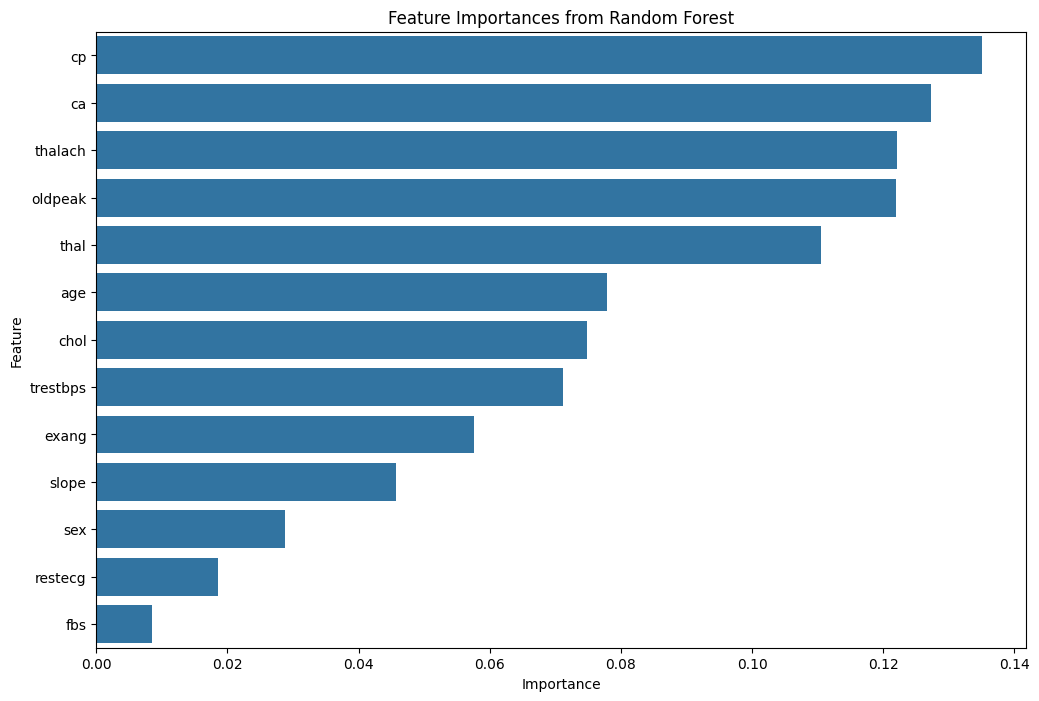

In [8]:
# Get feature importances from the Random Forest
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

#  **Step 5: Evaluate using cross-validation**
A single train-test split can be misleading. To get a more reliable measure of performance, we will evaluate our best model (the Random Forest) using 10-fold cross-validation.

In [9]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=10)

print("Cross-Validation Scores for each fold:")
print(cv_scores)
print(f"\nMean Cross-Validation Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {np.std(cv_scores):.4f}")
print("\n--> This gives us a more robust estimate of how the model will perform on unseen data.")

Cross-Validation Scores for each fold:
[1.         1.         1.         1.         1.         1.
 1.         1.         0.97058824 1.        ]

Mean Cross-Validation Score: 0.9971
Standard Deviation of Cross-Validation Scores: 0.0088

--> This gives us a more robust estimate of how the model will perform on unseen data.
